# QF 627 Programming and Computational Finance
## `Py`Day Week `1`

### How can you visually represent components of an equation?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%whos

Variable   Type      Data/Info
------------------------------
np         module    <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
plt        module    <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>


In [3]:
N =\
(
    np
    .linspace(1, 100, 400)
)

Y =\
    1 / np.sqrt(N)

In [4]:
print(N);print(Y)

[  1.           1.2481203    1.4962406    1.7443609    1.9924812
   2.2406015    2.4887218    2.73684211   2.98496241   3.23308271
   3.48120301   3.72932331   3.97744361   4.22556391   4.47368421
   4.72180451   4.96992481   5.21804511   5.46616541   5.71428571
   5.96240602   6.21052632   6.45864662   6.70676692   6.95488722
   7.20300752   7.45112782   7.69924812   7.94736842   8.19548872
   8.44360902   8.69172932   8.93984962   9.18796992   9.43609023
   9.68421053   9.93233083  10.18045113  10.42857143  10.67669173
  10.92481203  11.17293233  11.42105263  11.66917293  11.91729323
  12.16541353  12.41353383  12.66165414  12.90977444  13.15789474
  13.40601504  13.65413534  13.90225564  14.15037594  14.39849624
  14.64661654  14.89473684  15.14285714  15.39097744  15.63909774
  15.88721805  16.13533835  16.38345865  16.63157895  16.87969925
  17.12781955  17.37593985  17.62406015  17.87218045  18.12030075
  18.36842105  18.61654135  18.86466165  19.11278195  19.36090226
  19.609022

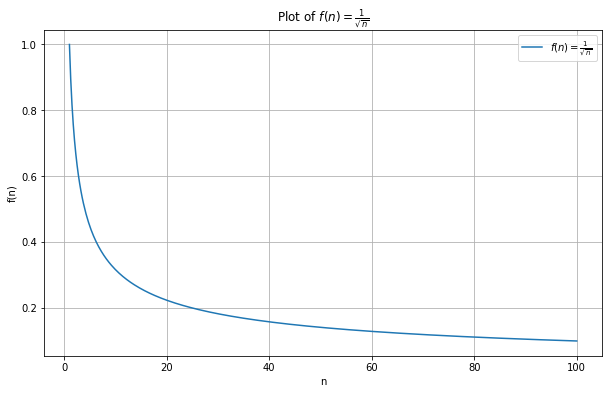

In [5]:
plt.figure(figsize = [10, 6]
          )

plt.plot(N, Y,
         label = r"$f(n) = \frac{1}{\sqrt{n}}$")

plt.title(r"Plot of $f(n) = \frac{1}{\sqrt{n}}$")

plt.xlabel("n")
plt.ylabel("f(n)")
plt.legend()
plt.grid(True)

plt.show()

### Confounders vs. Colliders ???

In [6]:
# Let's buils a simulated data set

np.random.seed(23082601)

N = 2000

x = np.random.normal(size = N)

y = 0.4 * x + np.random.normal(size = N)

# 0.4 = true average treatment effects

In [7]:
data =\
    {"x": x,
     "y": y}

In [8]:
type(data)

dict

In [9]:
import statsmodels.formula.api as smf

In [10]:
%whos

Variable   Type       Data/Info
-------------------------------
N          int        2000
Y          ndarray    400: 400 elems, type `float64`, 3200 bytes
data       dict       n=2
np         module     <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
plt        module     <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
smf        module     <module 'statsmodels.form<...>tsmodels/formula/api.py'>
x          ndarray    2000: 2000 elems, type `float64`, 16000 bytes
y          ndarray    2000: 2000 elems, type `float64`, 16000 bytes


In [11]:
~1

-2

In [12]:
~0

-1

In [13]:
~True

-2

In [14]:
~False

-1

In [15]:
correct_model =\
(
    smf
    .ols("y ~ x",
         data = data) 
    .fit()
)

print(correct_model
      .summary()
      .tables[1]
     )

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0201      0.022     -0.896      0.370      -0.064       0.024
x              0.3980      0.022     17.943      0.000       0.355       0.442


#### A Case for Confounders

In [16]:
# The real-world; Defined Question: b-hat question

In [17]:
np.random.seed(23082502)

N = 2000

confounder = np.random.normal(size = N)

x = 0.50 * confounder + np.random.normal(size = N)

y = 0.40 * x + 0.30 * confounder + np.random.normal(size = N) 

In [18]:
data =\
    {"x": x,
     "y": y,
     "confounder": confounder}

In [19]:
import pandas as pd

In [20]:
pd \
    .DataFrame(data)

,x,y,confounder
0,-0.161576,-0.659686,-0.443225
1,1.174343,0.921717,1.051660
2,0.719572,1.767428,1.568203
3,-0.643940,-0.525411,1.030198
4,-0.680004,-2.526188,0.165393
...,...,...,...
1995,-1.340106,-1.969901,-1.506838
1996,-0.702327,1.070637,0.740956
1997,-1.276713,-0.736637,-0.420210
1998,-0.230440,1.886882,1.137707


In [21]:
# This model will fall prey to omission variable bias.
model_without_confounder =\
(
    smf
    .ols(formula = "y ~ x",
         data = data)
    .fit()
)

print(model_without_confounder
      .summary()
      .tables[1]
     )

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0294      0.023      1.282      0.200      -0.016       0.074
x              0.5329      0.021     25.324      0.000       0.492       0.574


In [22]:
valid_model_controlling_for_confounder =\
(
    smf
    .ols(formula = "y ~ x + confounder",
         data = data)
    .fit()
)

print(valid_model_controlling_for_confounder)

print(valid_model_controlling_for_confounder
      .summary()
      .tables[1]
     )

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0322      0.022      1.451      0.147      -0.011       0.076
x              0.4082      0.023     17.729      0.000       0.363       0.453
confounder     0.2919      0.025     11.633      0.000       0.243       0.341


#### A Case for Colliders

In [23]:
np.random.seed(23082603)

N = 2000

X_financial_health = np.random.normal(size = N)

Y_stock_return = 0.10 * X_financial_health + np.random.normal(size = N)

COLLIDER_leverage = 1.20 * X_financial_health + 0.60 * Y_stock_return + np.random.normal(size = N)

In [24]:
data_with_COLLIDER =\
(
    pd
    .DataFrame(
    {
        "X_financial_health": X_financial_health,
        "Y_stock_return": Y_stock_return,
        "COLLIDER_leverage": COLLIDER_leverage
    }
    )
)

In [25]:
data_with_COLLIDER

,X_financial_health,Y_stock_return,COLLIDER_leverage
0,-1.603470,0.776567,-3.398866
1,0.014000,1.029779,0.097561
2,0.103805,2.220847,1.613957
3,-0.746349,-0.716504,-2.540918
4,-0.721821,0.036329,0.384351
...,...,...,...
1995,-1.953223,-1.104014,-3.654528
1996,-0.128386,1.743880,4.076628
1997,0.983471,0.914076,0.265910
1998,0.421471,0.263710,-0.536191


In [26]:
(
    data_with_COLLIDER
    .corr()
    .round(2)
)

,X_financial_health,Y_stock_return,COLLIDER_leverage
X_financial_health,1.00,0.14,0.74
Y_stock_return,0.14,1.00,0.44
COLLIDER_leverage,0.74,0.44,1.00


In [27]:
model_with_endogeneous_selection_bias =\
(
    smf
    .ols(formula = "Y_stock_return ~ X_financial_health + COLLIDER_leverage",
         data = data_with_COLLIDER)
    .fit()
)

In [28]:
print(model_with_endogeneous_selection_bias
      .summary()
      .tables[1]
     )

                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0009      0.019      0.048      0.962      -0.037       0.039
X_financial_health    -0.4239      0.028    -14.886      0.000      -0.480      -0.368
COLLIDER_leverage      0.4400      0.017     26.664      0.000       0.408       0.472


In [29]:
valid_model =\
(
    smf
    .ols(formula = "Y_stock_return ~ X_financial_health",
         data = data_with_COLLIDER)
    .fit()
)

# True Effects of B = 0.10

In [30]:
print(valid_model
      .summary()
      .tables[1])

                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0085      0.022     -0.380      0.704      -0.052       0.035
X_financial_health     0.1386      0.022      6.222      0.000       0.095       0.182


`Thank you for working with the script 👍`